## Building a neural network to convert degrees celsius to fahrenheit

In [4]:
# Import the necessary modules
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt

import numpy as np

In [5]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

In [6]:
for i in range(len(celsius)):
    print(f"{celsius[i]} degress celsius = {fahrenheit[i]} fahrenheit")

-40.0 degress celsius = -40.0 fahrenheit
-10.0 degress celsius = 14.0 fahrenheit
0.0 degress celsius = 32.0 fahrenheit
8.0 degress celsius = 46.0 fahrenheit
15.0 degress celsius = 59.0 fahrenheit
22.0 degress celsius = 72.0 fahrenheit
38.0 degress celsius = 100.0 fahrenheit


### Creating a neural layer model

In [7]:
layer1 = tf.keras.layers.Dense(units = 1, input_shape=[1])
model = tf.keras.Sequential([layer1])

In [8]:
model.compile(loss = "mean_squared_error",
             optimizer = tf.keras.optimizers.Adam(0.1))

In [9]:
training_model = model.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("Finished training the model")

Finished training the model


### Visualize our training

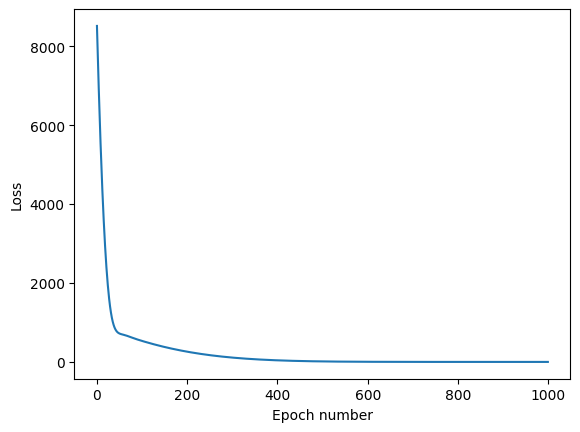

In [11]:
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.plot(training_model.history['loss'])

### Make a prediction

In [12]:
print(model.predict([-40, 100]))

1/1 [==============================] - 0s 123ms/step
[[-40.043297]
 [211.73987 ]]


### Get the weights of first layer

In [13]:
print("These are layer1 variables: {}".format(layer1.get_weights()))

These are layer1 variables: [array([[1.7984513]], dtype=float32), array([31.89475], dtype=float32)]


## Creating a model with multiple layers

In [14]:
layer1 = tf.keras.layers.Dense(units=4, input_shape=[1])
layer2 = tf.keras.layers.Dense(units=4)
layer3 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([layer1, layer2, layer3])

model.compile(loss = 'mean_squared_error',
             optimizer = tf.keras.optimizers.Adam(0.1))

In [15]:
model.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("Finished training the model.")
print("Model prediction for 0 celsius is {} and for 100 celsius is {}".format(model.predict([0]), model.predict([100])))

Finished training the model.
1/1 [==============================] - 0s 30ms/step
Model prediction for 0 celsius is [[31.952526]] and for 100 celsius is [[211.74745]]


In [16]:
print(f"These are layer1 variables: {layer1.get_weights()}")
print(f"These are layer2 variables: {layer2.get_weights()}")
print(f"These are layer3 variables: {layer3.get_weights()}")

These are layer1 variables: [array([[0.24003164, 0.1687286 , 0.1311717 , 0.6957429 ]], dtype=float32), array([-1.6478301,  2.7784705, -1.8442563,  2.924586 ], dtype=float32)]
These are layer2 variables: [array([[-0.1409901 ,  0.3682403 ,  0.73207885,  0.0811826 ],
       [ 0.07663234, -0.9123305 , -0.93672955,  1.0570129 ],
       [-0.17058598, -0.22419958,  0.22380431, -1.0221949 ],
       [ 0.66450477, -0.9213064 , -0.569489  ,  0.41505402]],
      dtype=float32), array([ 2.7899876, -2.8675845, -2.8288531,  2.6786547], dtype=float32)]
These are layer3 variables: [array([[ 1.154289  ],
       [-0.9684302 ],
       [-0.83307135],
       [ 0.8812031 ]], dtype=float32), array([2.7606304], dtype=float32)]
